# 05 - Statistiques Univariées

In [3]:
import os # Vérif du chemin d'accès à retirer après
os.getcwd() # Vérif du chemin d'accès à retirer après


'c:\\Users\\gaoks\\Isen\\ProjetM1\\m1Project_SciML\\notebooks\\dataPreparation'


> ### Comment calculer la moyenne de nos températures à la surface dans le cas de la Manche ?
Tout d'abord, rappelons la formule globale pour le calcul d'une moyenne spatiale sur une sphère :

$$
\bar{T}(t) = \frac{
\sum_{\text{lat, lon}} T(t, \text{lat}, \text{lon}) \cdot \cos(\text{lat})
}{
\sum_{\text{lat, lon}} \cos(\text{lat})
}
$$

Les termes $cos(lat)$ permettent de faire la pondération à cause de la déformation spatiale d'une sphère : un pixel au niveau des pôles aura une pondération plus faible qu'un pixel au niveau de l'équateur. Cette pondération ne prend pas en compte la longitude puisque celle-ci est fixe pour une latitude donnée.

Cependant dans notre cas nous sommes dans une zone géographique réduite (la Manche). Par conséquent la différence de surface représentée par nos pixels est négligeable et nous pouvons donc simplifier la formule :

$$
\bar{T}(t) = \frac{
\sum_{\text{lat, lon}} T(t, \text{lat}, \text{lon})
}{
N_{\text{pixels}}
}
$$

Ainsi nous obtenons un vecteur temporel contenant la moyenne des températures à la surface de la Manche chaque jour.



<xarray.DataArray 'analysed_sst' (time: 3652)> Size: 15kB
array([ 9.68311 ,  9.698678,  9.617641, ..., 10.619794, 10.62044 ,
       10.526394], shape=(3652,), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 29kB 2010-01-01 2010-01-02 ... 2019-12-31
Attributes:
    units:          degC
    standard_name:  sea_surface_temperature
    long_name:      Analysed sea and under-ice surface temperature
    comment:        The under-ice SST is the freezing point temperature TS, c...
    source:         AASTI v2 SST/IST, ESA CCI SST and C3S SST L2P products
    valid_range:    [-6000  4500]


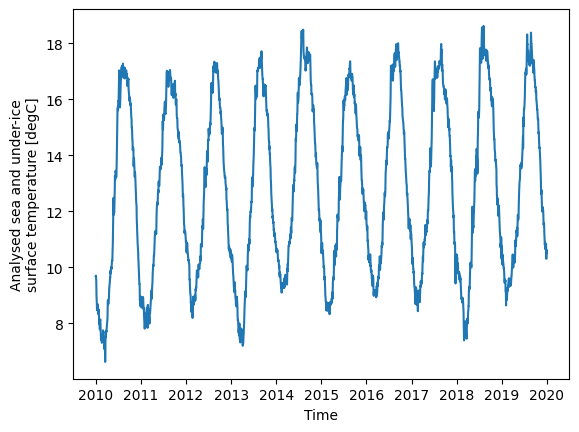

In [15]:
import xarray as xr
import matplotlib as plt

dataset = xr.open_dataset("../../data/processed/sstCOPERNICUS20102019Processed.nc")

sst_mean = dataset.analysed_sst.mean(dim=["latitude", "longitude"])

print(sst_mean)

sst_mean.plot()



> ### Comment calculer la valeur médiane dans notre dataset ?
&nbsp; 
La médiane spatiale pour un jour donné correspond à la valeur de température qui sépare la moitié des pixels océaniques de la Manche ayant une valeur supérieure et l'autre moitié ayant une valeur inférieure.
Pour un dataset global sur une sphère il faudrait pondérer les pixels par leur surface avec $\cos(lat)$ puis cumuler les poids jusqu'à atteindre 50% du total.
Cependant pour les mêmes raisons que notre moyenne nous pouvons donc ignorer les poids. 
Ainsi pour chaque jour nous prenons toutes les valeurs SST des pixels puis nous calculons la médiane spatiale c'est-à-dire la valeur centrale de l’échantillon ordonné. Avec 3652 valeurs (une par jour sur 9 ans) nous obtenons alors un vecteur temporel contenant la médiane SST de la Manche pour chaque jour.

<xarray.DataArray 'analysed_sst' (time: 3652)> Size: 15kB
array([10.      , 10.      ,  9.929993, ..., 10.820007, 10.820007,
       10.679993], shape=(3652,), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 29kB 2010-01-01 2010-01-02 ... 2019-12-31
Attributes:
    units:          degC
    standard_name:  sea_surface_temperature
    long_name:      Analysed sea and under-ice surface temperature
    comment:        The under-ice SST is the freezing point temperature TS, c...
    source:         AASTI v2 SST/IST, ESA CCI SST and C3S SST L2P products
    valid_range:    [-6000  4500]


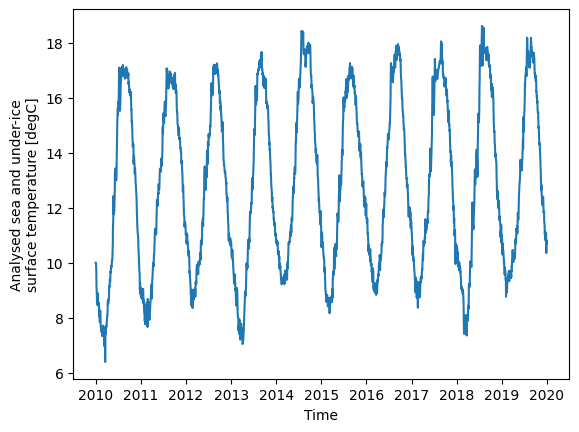

In [23]:
sst_median = dataset.analysed_sst.median(dim=["latitude","longitude"])

print(sst_median)
sst_median.plot()